# **Operations on the Histogram** 
**Notebook creado por [Marlon Tecotl](https://www.linkedin.com/in/marlon-tecotl/) para el Master en [Vision Artificial](https://www.techtitute.com/informatica/master/master-vision-artificial) en [Tech](https://www.techtitute.com/) (2024).**





Importamos las librerias

In [7]:
# importamos las libreiras
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
import cv2
import numpy as np

Cargamos la imagen con la que vamos a trabajar del joker

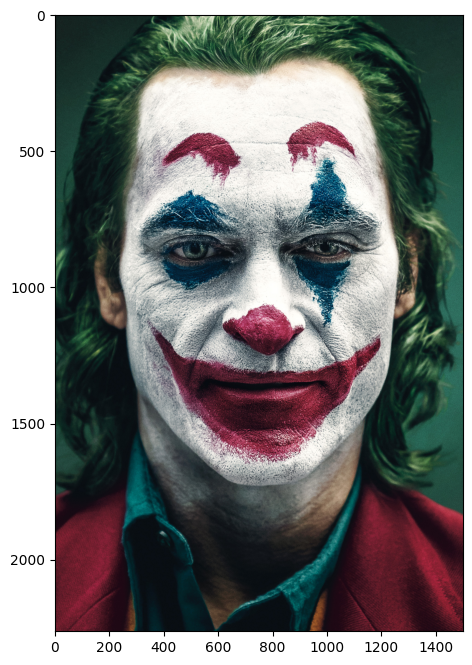

Shape = (2264, 1500, 3)


In [8]:
# nombre de la imagen a cargar
image_path = 'data/Joker.jpg'

# cargamos la imagen
image  = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.show()

print('Shape = ' + str(image.shape))

### **Mostar el histograma de color de la imagen**
En primer lugar vamos a mostrar el histograma de color.
Consultar el metodo [cv2.calcHist()](https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/)

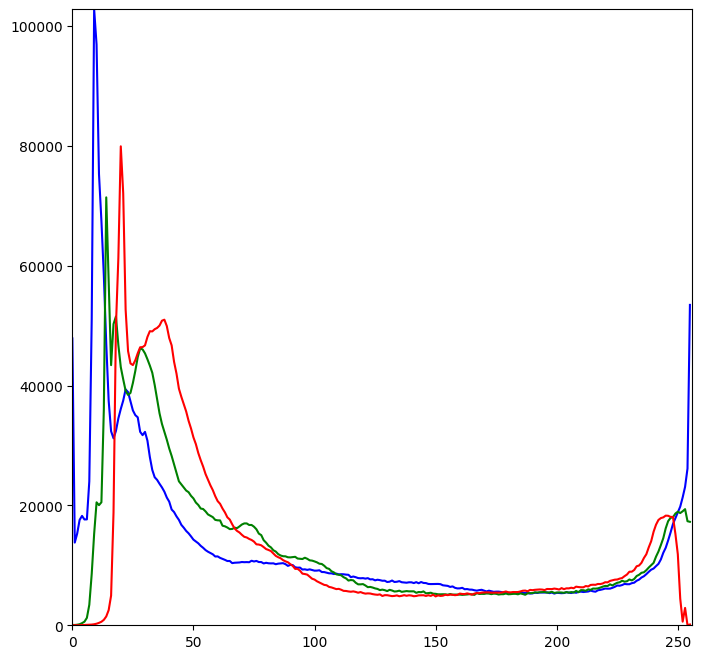

In [9]:
color = ('b','g','r')
maxy = 0
for i, col in enumerate(color):
    hist = cv2.calcHist([image],[i],None,[256],[0,256])
    maxhist = np.max(hist)
    if maxhist > maxy:
        maxy = maxhist
    plt.plot(hist, color = col)
    plt.xlim([0,256])
    plt.ylim([0,maxy])
plt.show()

### **Mostar el histograma de monocromo de la imagen**
A continuacion se pide convertir la imagen a escala de grises y mostrar su histograma en un subplot donde veamos la imagen en escala de grises y el histograma.

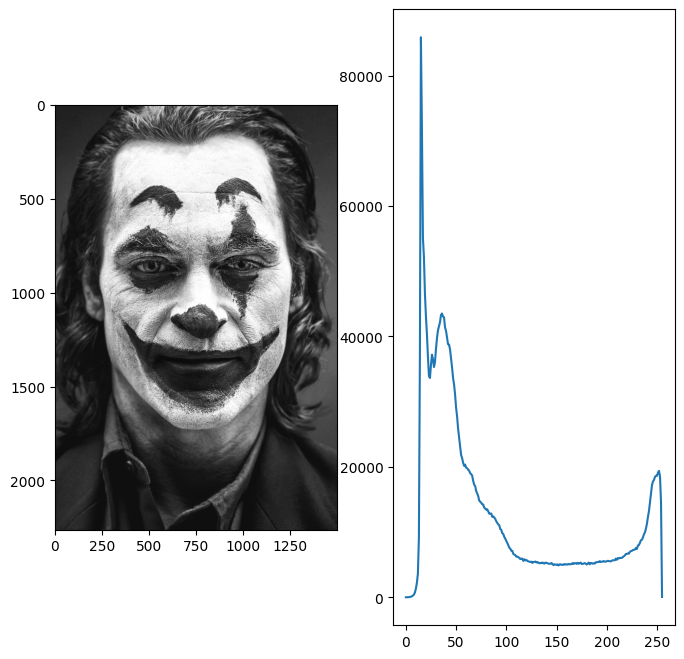

In [10]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.subplot(121),plt.imshow(gray_image, cmap = 'gray')
plt.subplot(122),plt.plot(hist)
plt.show()

### **Definir un umbral manual**
A continuacion vamos a definir un umbral de 127 manualmente y vamos a contar los pixeles por encima y por debajo de este umbral. Se pide mostrar el histograma  y añadir una linea marcando el threhosld. Printar los valores obtenidos con el threshold manual.

El resultado deberia ser asi:

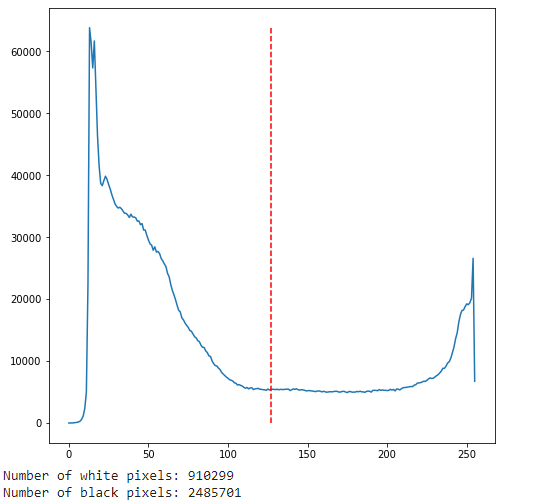

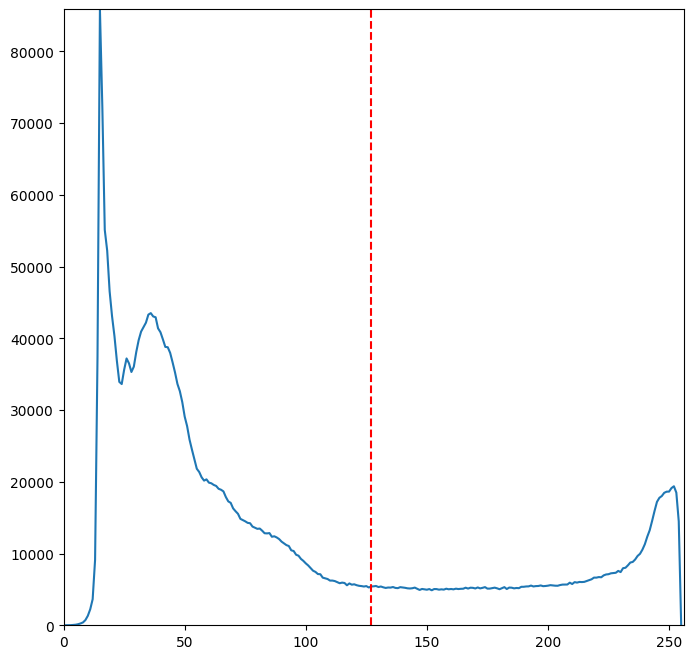

Number of white pixels: 904712
Number of black pixels: 2491288


In [11]:
# Definimos el umbra
threshold = 127

# counting the number of pixels
number_of_white_pix = np.sum(gray_image >= threshold)
number_of_black_pix = np.sum(gray_image < threshold)

# pintamos el histograma y el umbral
plt.plot(hist)
plt.plot(np.array([threshold,threshold]),np.array([0,np.max(hist)]), color='red', linestyle='--')
plt.xlim([0,256])
plt.ylim([0,np.max(hist)])
plt.show()

# mostramos los resutlados
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

### **Curvas de color**
A continuacion hemos definido dos metodos para poder pintar y aplicar curvas de modificacion del histograma y analizar los efectos de las diferentes operaciones.


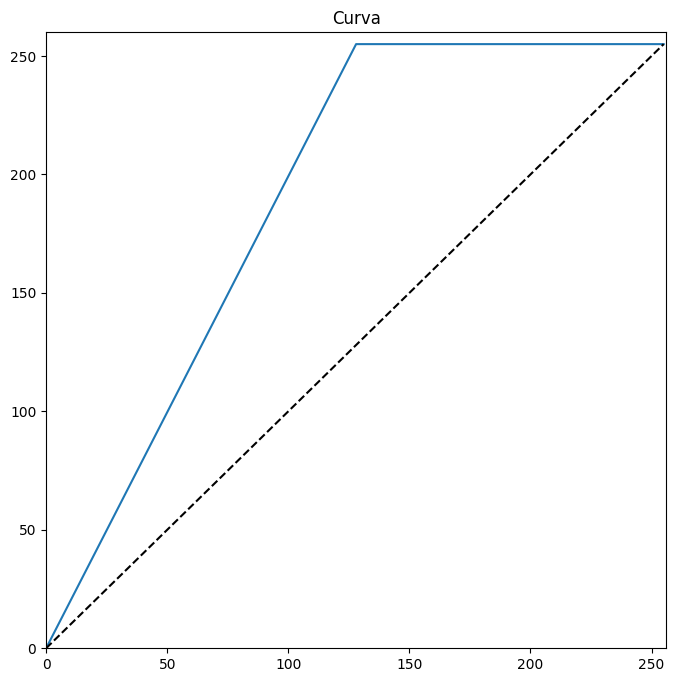

LUT: [  0.          1.9921875   3.984375    5.9765625   7.96875     9.9609375
  11.953125   13.9453125  15.9375     17.9296875  19.921875   21.9140625
  23.90625    25.8984375  27.890625   29.8828125  31.875      33.8671875
  35.859375   37.8515625  39.84375    41.8359375  43.828125   45.8203125
  47.8125     49.8046875  51.796875   53.7890625  55.78125    57.7734375
  59.765625   61.7578125  63.75       65.7421875  67.734375   69.7265625
  71.71875    73.7109375  75.703125   77.6953125  79.6875     81.6796875
  83.671875   85.6640625  87.65625    89.6484375  91.640625   93.6328125
  95.625      97.6171875  99.609375  101.6015625 103.59375   105.5859375
 107.578125  109.5703125 111.5625    113.5546875 115.546875  117.5390625
 119.53125   121.5234375 123.515625  125.5078125 127.5       129.4921875
 131.484375  133.4765625 135.46875   137.4609375 139.453125  141.4453125
 143.4375    145.4296875 147.421875  149.4140625 151.40625   153.3984375
 155.390625  157.3828125 159.375     161.36718

C:\Users\tecot\AppData\Local\Temp\ipykernel_7340\2925366368.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(input_image, cmap = 'gray')


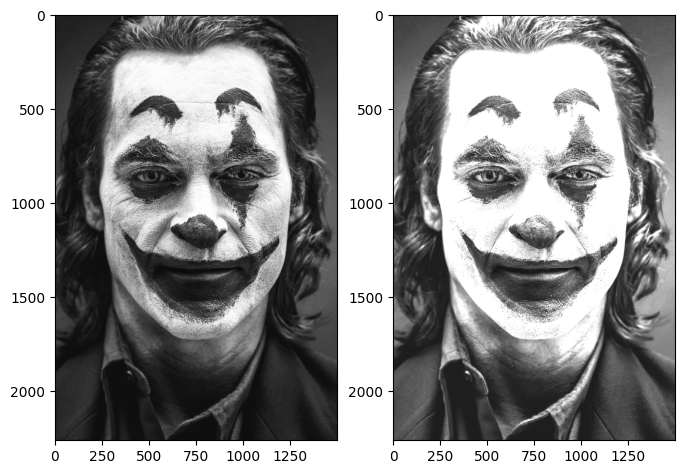

In [12]:
def plot_gray_curve(curve_x, curve_y):
  # pintamos el grafico de curvas
  plt.plot(curve_x, curve_y)
  plt.title('Curva')
  plt.xlim([0, 256])
  plt.ylim([0, 260])
  plt.plot(np.arange(256), np.arange(256), color='black', linestyle='--')
  plt.show()

def apply_curve(input_image, curve_x, curve_y):
  # copiamos la imagen
  out_image = input_image.copy()

  # creamos la lut y la aplicamos a la imagen
  LUT = np.interp(np.arange(0,256), curve_x, curve_y)
  print(f"LUT: {LUT}")
  out_image = cv2.LUT(out_image, LUT)

  plt.title('Resultados')
  plt.subplot(121), plt.imshow(input_image, cmap = 'gray')
  plt.subplot(122), plt.imshow(out_image, cmap = 'gray')
  plt.show()

# valores de la curva
curve_x = np.array([0,128,255])
curve_y = np.array([0,255,255])

# Pintamos la curva y la aplicamos a la imagen
plot_gray_curve(curve_x, curve_y)
apply_curve(gray_image, curve_x, curve_y)

### **Pixel map 1**
A continuacion se pide crear un filtro que solo deje ponga todos los pixeles por debajo del unmbral de 0 a 127


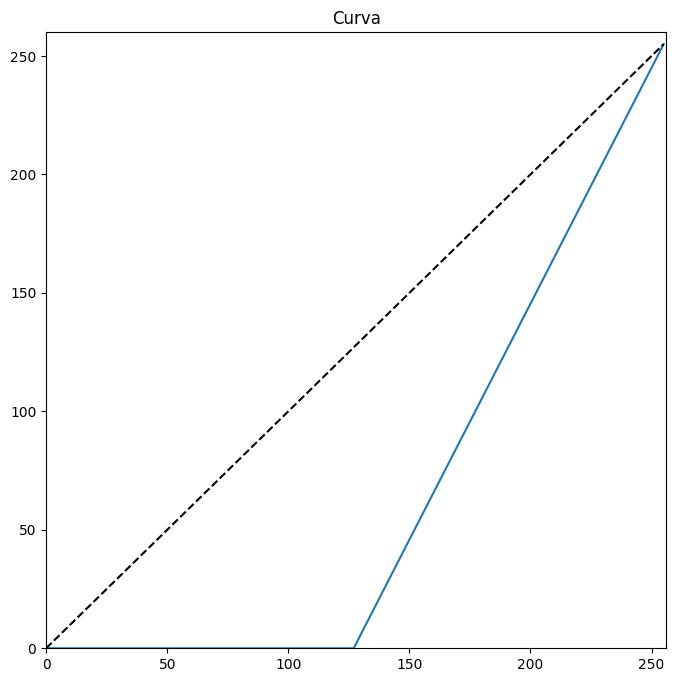

LUT: [  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.

C:\Users\tecot\AppData\Local\Temp\ipykernel_7340\2925366368.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(input_image, cmap = 'gray')


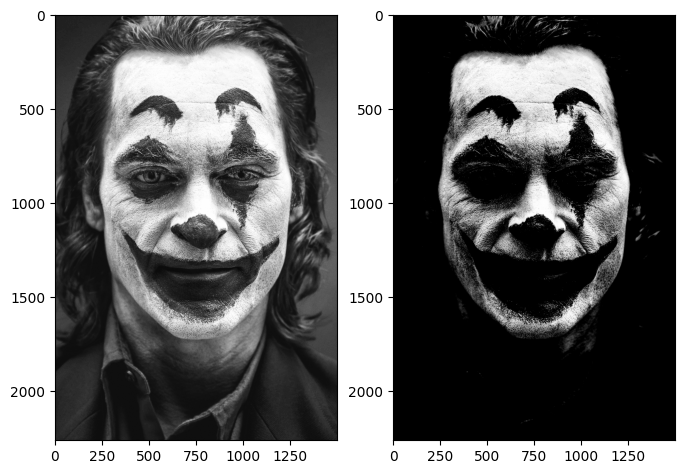

In [13]:
# valores de la curva
curve_x = np.array([0,127,255])
curve_y = np.array([0,0,255])

# Pintamos la curva y la aplicamos a la imagen
plot_gray_curve(curve_x, curve_y)
apply_curve(gray_image, curve_x, curve_y)

### **Pixel map 2**
A continuacion se pide crear un filtro que solo deje ponga todos los pixeles por encima del unmbral de 0 a 127


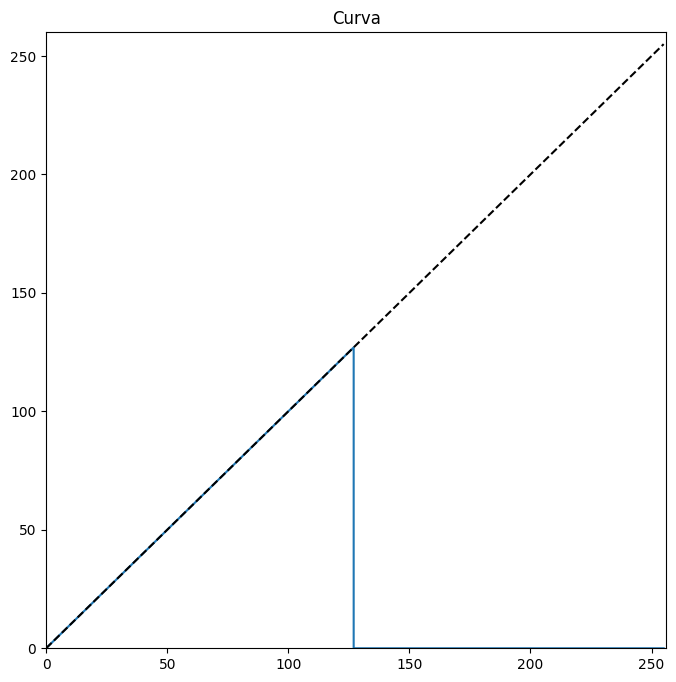

LUT: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 

C:\Users\tecot\AppData\Local\Temp\ipykernel_7340\2925366368.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(input_image, cmap = 'gray')


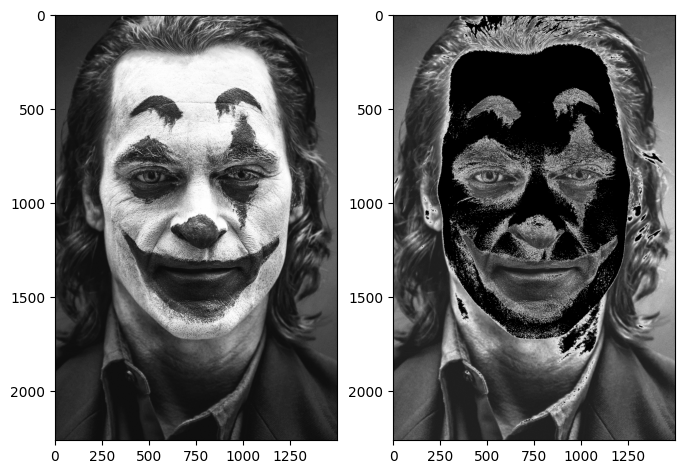

In [14]:
# valores de la curva
curve_x = np.array([0, 127, 127, 255])
curve_y = np.array([0, 127, 0, 0])

# Pintamos la curva y la aplicamos a la imagen
plot_gray_curve(curve_x, curve_y)
apply_curve(gray_image, curve_x, curve_y)

### **Pixel map 3**
Binarizar la imagen, es decir todos los pixeles por debajo de 127 a 0 y por encima a 255


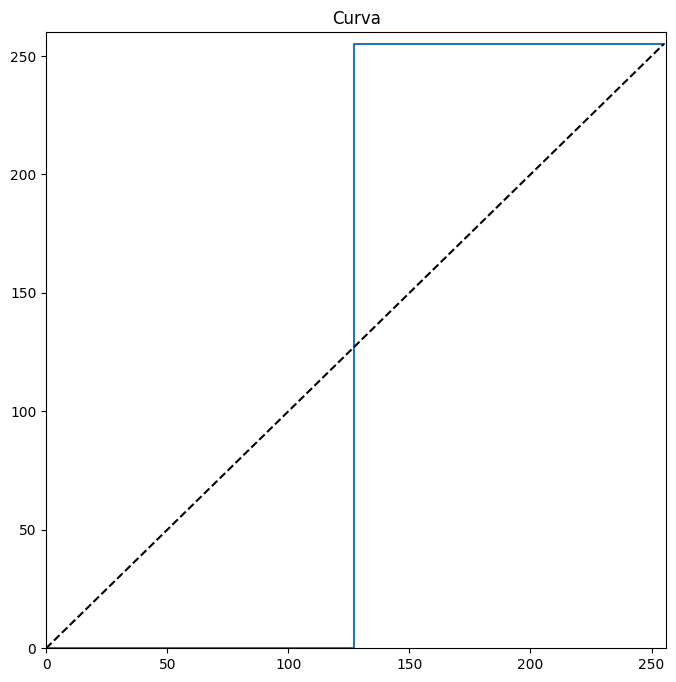

LUT: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 

C:\Users\tecot\AppData\Local\Temp\ipykernel_7340\2925366368.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(input_image, cmap = 'gray')


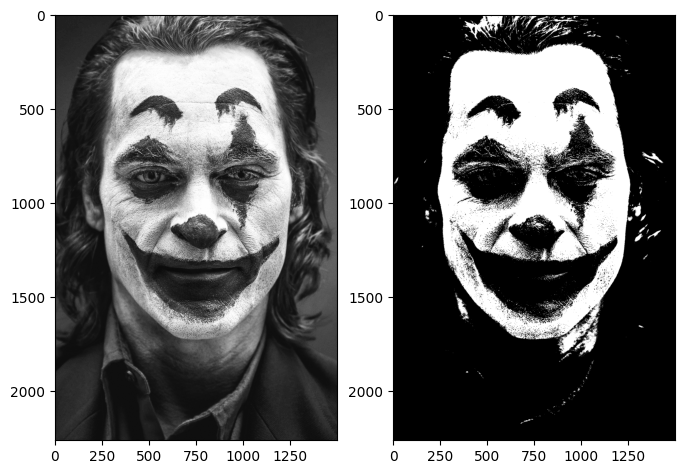

In [15]:
# valores de la curva
curve_x = np.array([0, 127, 127, 255])
curve_y = np.array([0, 0, 255, 255])

# Pintamos la curva y la aplicamos a la imagen
plot_gray_curve(curve_x, curve_y)
apply_curve(gray_image, curve_x, curve_y)

### **Pixel map 4**
A continuacion se pide crear un filtro como el siguiente:

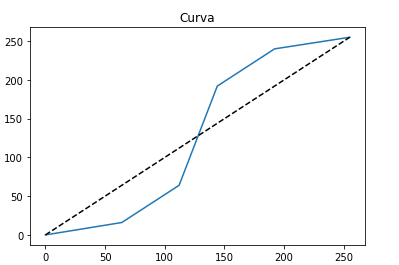


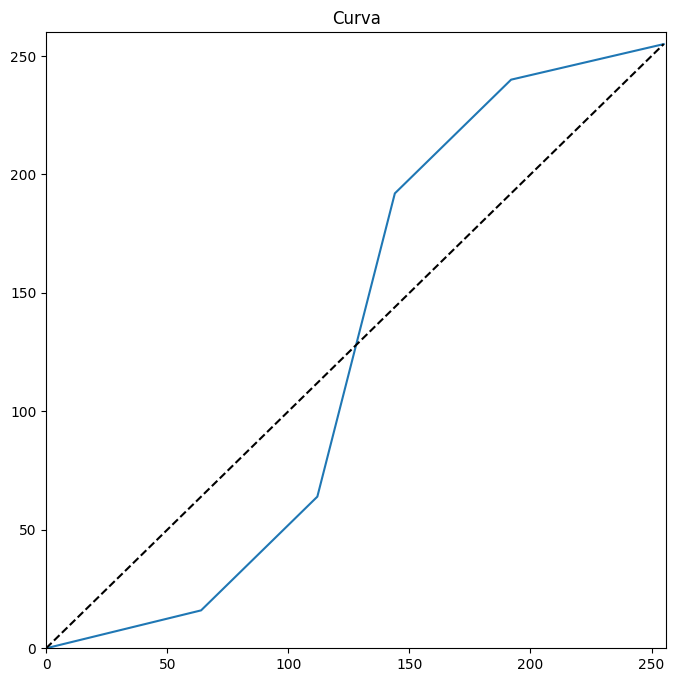

LUT: [0.00000000e+00 2.50000000e-01 5.00000000e-01 7.50000000e-01
 1.00000000e+00 1.25000000e+00 1.50000000e+00 1.75000000e+00
 2.00000000e+00 2.25000000e+00 2.50000000e+00 2.75000000e+00
 3.00000000e+00 3.25000000e+00 3.50000000e+00 3.75000000e+00
 4.00000000e+00 4.25000000e+00 4.50000000e+00 4.75000000e+00
 5.00000000e+00 5.25000000e+00 5.50000000e+00 5.75000000e+00
 6.00000000e+00 6.25000000e+00 6.50000000e+00 6.75000000e+00
 7.00000000e+00 7.25000000e+00 7.50000000e+00 7.75000000e+00
 8.00000000e+00 8.25000000e+00 8.50000000e+00 8.75000000e+00
 9.00000000e+00 9.25000000e+00 9.50000000e+00 9.75000000e+00
 1.00000000e+01 1.02500000e+01 1.05000000e+01 1.07500000e+01
 1.10000000e+01 1.12500000e+01 1.15000000e+01 1.17500000e+01
 1.20000000e+01 1.22500000e+01 1.25000000e+01 1.27500000e+01
 1.30000000e+01 1.32500000e+01 1.35000000e+01 1.37500000e+01
 1.40000000e+01 1.42500000e+01 1.45000000e+01 1.47500000e+01
 1.50000000e+01 1.52500000e+01 1.55000000e+01 1.57500000e+01
 1.60000000e+01 1.7

C:\Users\tecot\AppData\Local\Temp\ipykernel_7340\2925366368.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(input_image, cmap = 'gray')


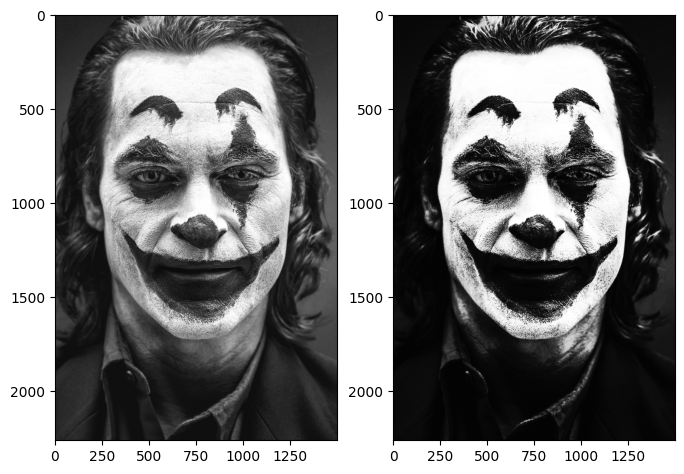

In [16]:
# valores de la curva
curve_x = np.array([0, 64, 112, 128, 144, 192, 255])
curve_y = np.array([0, 16, 64, 128, 192, 240, 255])

# Pintamos la curva y la aplicamos a la imagen
plot_gray_curve(curve_x, curve_y)
apply_curve(gray_image, curve_x, curve_y)

### **Pixel map 5**
En este apartado tenemos que invertir la imagen.


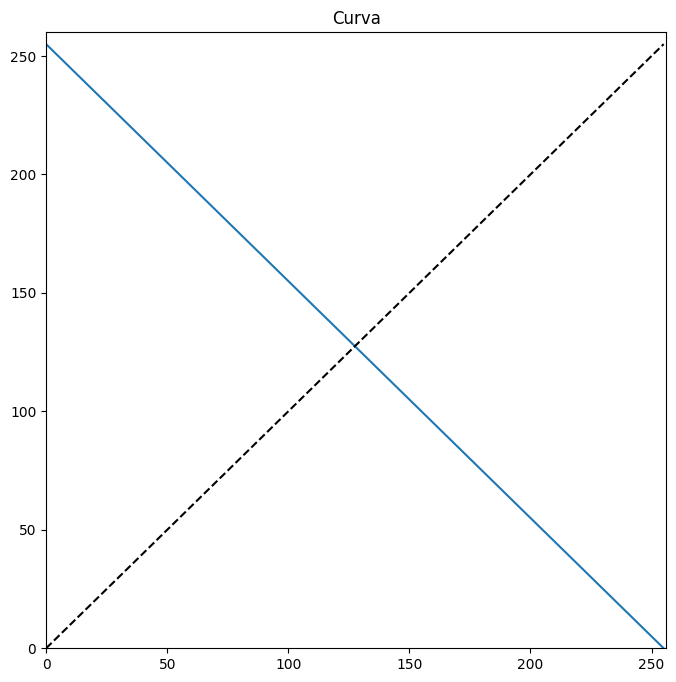

LUT: [255. 254. 253. 252. 251. 250. 249. 248. 247. 246. 245. 244. 243. 242.
 241. 240. 239. 238. 237. 236. 235. 234. 233. 232. 231. 230. 229. 228.
 227. 226. 225. 224. 223. 222. 221. 220. 219. 218. 217. 216. 215. 214.
 213. 212. 211. 210. 209. 208. 207. 206. 205. 204. 203. 202. 201. 200.
 199. 198. 197. 196. 195. 194. 193. 192. 191. 190. 189. 188. 187. 186.
 185. 184. 183. 182. 181. 180. 179. 178. 177. 176. 175. 174. 173. 172.
 171. 170. 169. 168. 167. 166. 165. 164. 163. 162. 161. 160. 159. 158.
 157. 156. 155. 154. 153. 152. 151. 150. 149. 148. 147. 146. 145. 144.
 143. 142. 141. 140. 139. 138. 137. 136. 135. 134. 133. 132. 131. 130.
 129. 128. 127. 126. 125. 124. 123. 122. 121. 120. 119. 118. 117. 116.
 115. 114. 113. 112. 111. 110. 109. 108. 107. 106. 105. 104. 103. 102.
 101. 100.  99.  98.  97.  96.  95.  94.  93.  92.  91.  90.  89.  88.
  87.  86.  85.  84.  83.  82.  81.  80.  79.  78.  77.  76.  75.  74.
  73.  72.  71.  70.  69.  68.  67.  66.  65.  64.  63.  62.  61.  60.
 

C:\Users\tecot\AppData\Local\Temp\ipykernel_7340\2925366368.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(input_image, cmap = 'gray')


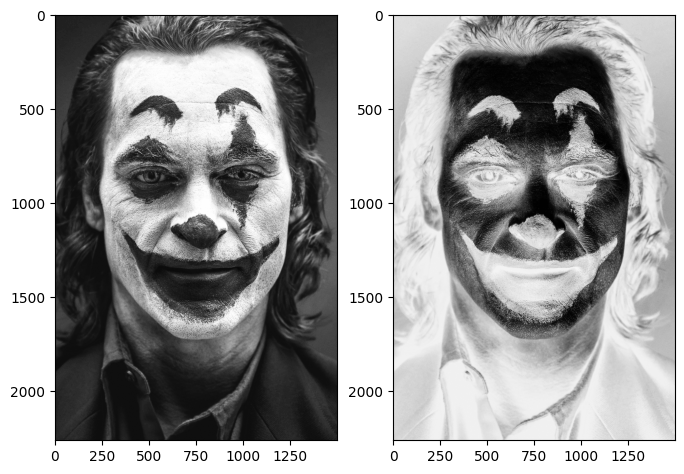

In [17]:
# valores de la curva
curve_x = np.array([0, 255])
curve_y = np.array([255, 0,])

# Pintamos la curva y la aplicamos a la imagen
plot_gray_curve(curve_x, curve_y)
apply_curve(gray_image, curve_x, curve_y)

### **Pixel map 6**
Aplicar el filtro de recorte. Este filtro tiene un valor superior e inferior. Por debajo del corte inferior el valor debe ser igual al corte inferior y por encima al corte superior el valor debe quedar igual al corte superior.


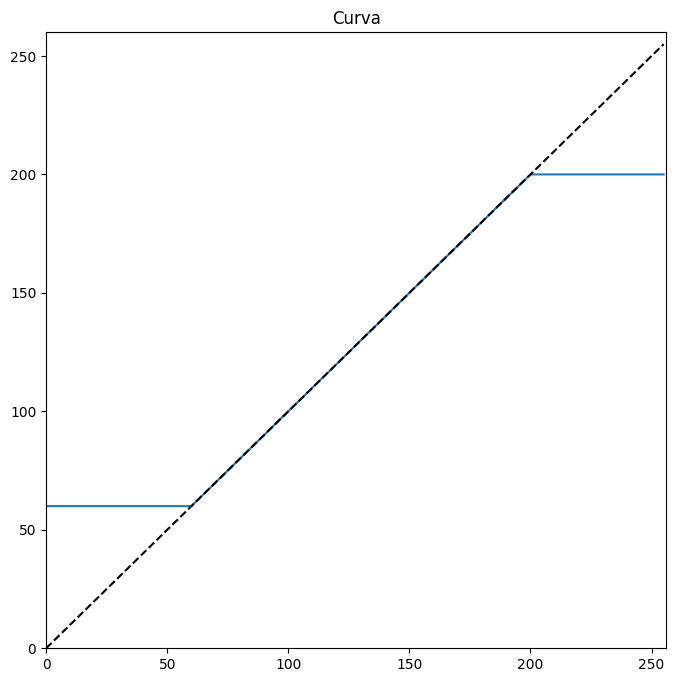

LUT: [ 60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 

C:\Users\tecot\AppData\Local\Temp\ipykernel_7340\2925366368.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(input_image, cmap = 'gray')


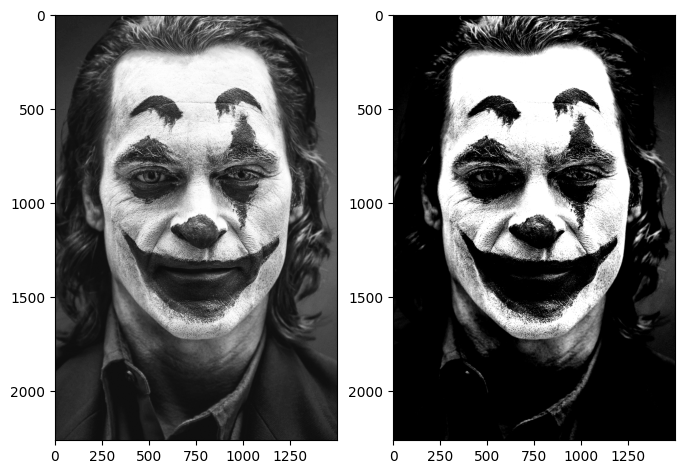

In [18]:
# valores de la curva
curve_x = np.array([0, 60, 200, 255])
curve_y = np.array([60, 60, 200, 200])

# Pintamos la curva y la aplicamos a la imagen
plot_gray_curve(curve_x, curve_y)
apply_curve(gray_image, curve_x, curve_y)

### **Binarizar mediante metodo threshold**
En el siguiente apartado se pide binarizar usando el metodo [cv2.threshold](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html) para un valor de 127.

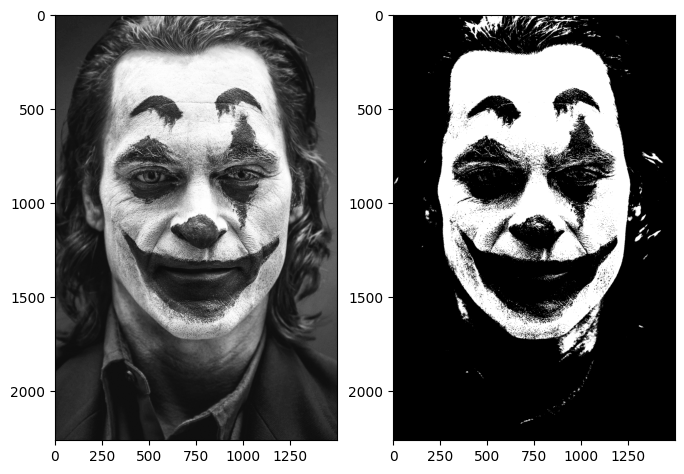

In [19]:
# aplicamos el threshold con la funcion de opencv
ret,out_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

plt.subplot(121), plt.imshow(gray_image, cmap = 'gray')
plt.subplot(122), plt.imshow(out_image, cmap = 'gray')
plt.show()

### **Ecualizacion del histograma en color**
En el siguiente apartado vamos a ecualizar el histograma usando la imagen en color del joker. Para resolverlo consultar la doc de [histogram_equalization](https://docs.opencv.org/3.4/d5/daf/tutorial_py_histogram_equalization.html) en opencv.
 Mas info sobre ecualizacion del histograma [aqui](https://en.wikipedia.org/wiki/Histogram_equalization)

En primer lugar vamos a calcular el histograma promedio para la imagen a color del joker. Recargamos la imagen con el siguiente codigo


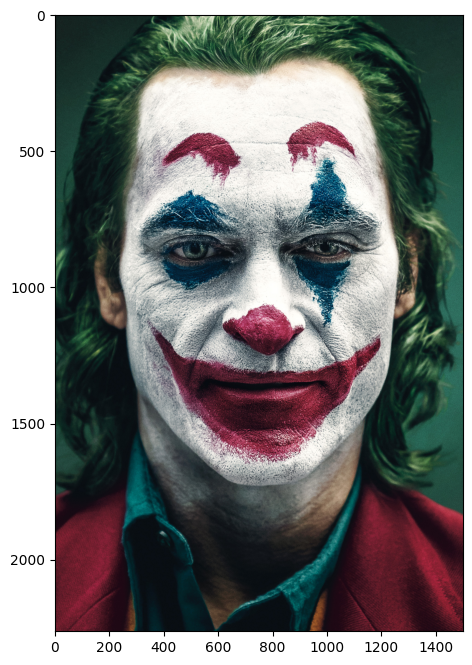

In [20]:
# nombre de la imagen a cargar
image_path = 'data/Joker.jpg'

# cargamos la imagen
image  = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Ahora se pide calcular el histograma promedio de color y hacer un subplot mostrando el histograma color y otro el histograma promedio


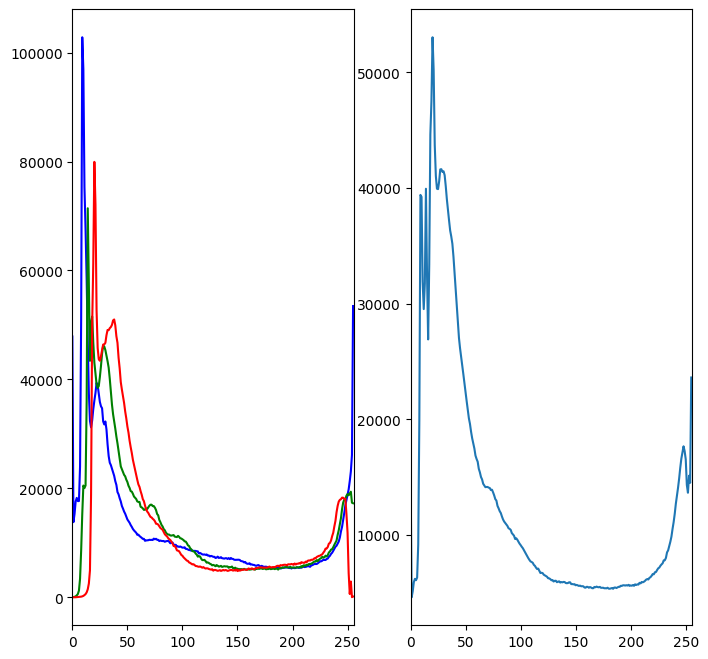

In [21]:
# como es una imagen en color calculamos los tres histogramas
hist0 = cv2.calcHist([image],[0],None,[256],[0,256])
hist1 = cv2.calcHist([image],[1],None,[256],[0,256])
hist2 = cv2.calcHist([image],[2],None,[256],[0,256])

# calculamos el histograma prodemio
hist = (hist0 + hist1 + hist2) /3

# mostramos los resultados
plt.subplot(121)
plt.plot(hist0, color = 'b'), plt.xlim([0,256])
plt.plot(hist1, color = 'g'), plt.xlim([0,256])
plt.plot(hist2, color = 'r'), plt.xlim([0,256])
plt.subplot(122)
plt.plot(hist), plt.xlim([0,256])
plt.show()

A continuación, seguir estos pasos a seguir son:


*   Calcular el cdf (cumulative distribution function)
*   Normalizar el resultaddo
*   Pintar el histograma y la distribucion


cdf: [  15982.333   20601.      25739.      31663.666   37876.332   43974.
   50300.332   59480.      79414.     118826.33   158062.66   189982.33
  219521.     251294.67   291238.7    323671.7    350588.34   384018.7
  428661.03   476190.03   529233.     579455.3    623183.     664226.3
  704177.3    744088.     784674.     826293.     867927.3    909328.6
  950787.94   991900.94  1032067.94  1071109.    1109183.6   1146384.6
 1182720.    1218536.6   1253733.    1287811.6   1320505.    1351940.
 1381846.4   1410376.8   1437415.8   1463552.8   1488951.4   1513590.
 1537481.4   1560576.8   1582850.8   1604422.1   1625258.8   1645358.1
 1664965.5   1683896.1   1702261.5   1720161.9   1737643.5   1754515.9
 1771093.5   1787434.5   1803167.5   1818592.1   1833613.5   1848422.1
 1862856.8   1877152.8   1891294.1   1905450.1   1919607.5   1933705.1
 1947771.1   1961662.8   1975579.8   1989268.1   2002693.1   2015801.8
 2028783.4   2041305.8   2053617.4   2065682.8   2077586.8   2089200.1
 21

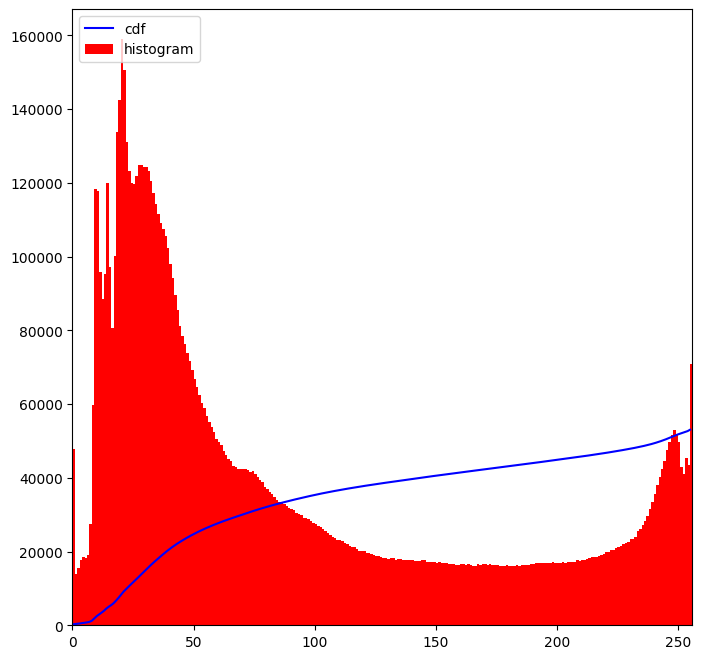

In [22]:
cdf = hist.cumsum()
print(f"cdf: {cdf}")
cdf_normalized = cdf * float(hist.max()) / cdf.max()
print(f"cdf_normalized: {cdf_normalized}")
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Por ultimo aplicar la ecualizacion del histograma y mostrar los resultados. En primer lugar un subplot con la imagen original y la imagen de la ecualizacion. Deberiamos ver una mejor distribcion en la segunda.


cdf_m: [  15982.333   20601.      25739.      31663.666   37876.332   43974.
   50300.332   59480.      79414.     118826.33   158062.66   189982.33
  219521.     251294.67   291238.7    323671.7    350588.34   384018.7
  428661.03   476190.03   529233.     579455.3    623183.     664226.3
  704177.3    744088.     784674.     826293.     867927.3    909328.6
  950787.94   991900.94  1032067.94  1071109.    1109183.6   1146384.6
 1182720.    1218536.6   1253733.    1287811.6   1320505.    1351940.
 1381846.4   1410376.8   1437415.8   1463552.8   1488951.4   1513590.
 1537481.4   1560576.8   1582850.8   1604422.1   1625258.8   1645358.1
 1664965.5   1683896.1   1702261.5   1720161.9   1737643.5   1754515.9
 1771093.5   1787434.5   1803167.5   1818592.1   1833613.5   1848422.1
 1862856.8   1877152.8   1891294.1   1905450.1   1919607.5   1933705.1
 1947771.1   1961662.8   1975579.8   1989268.1   2002693.1   2015801.8
 2028783.4   2041305.8   2053617.4   2065682.8   2077586.8   2089200.1
 

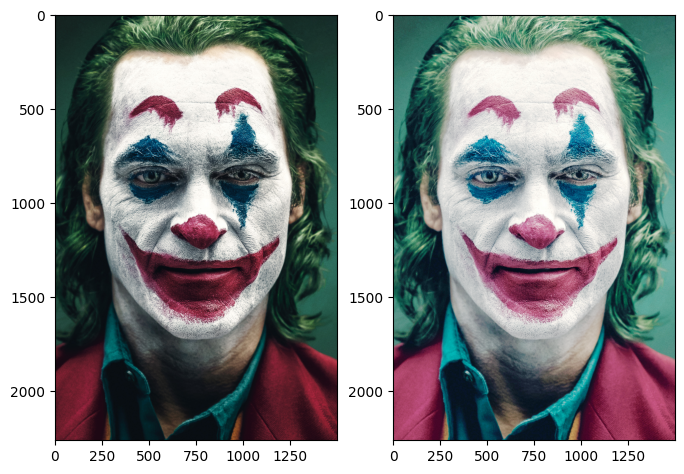

In [23]:
cdf_m = np.ma.masked_equal(cdf,0)
print(f"cdf_m: {cdf_m}")

cdf_m_2 = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
print(f"cdf_m_2: {cdf_m_2}")

out_cdf = np.ma.filled(cdf_m_2,0).astype('uint8')
print(f"out_cdf: {out_cdf}")

# Aplicamos el cdf
out_image = out_cdf[image]
print(f"out_image: {out_image}")

# pintamos las imagenes
plt.subplot(121), plt.imshow(image)
plt.subplot(122), plt.imshow(out_image)
plt.show()

En segundo lugar mostrar el histograma ecualizado

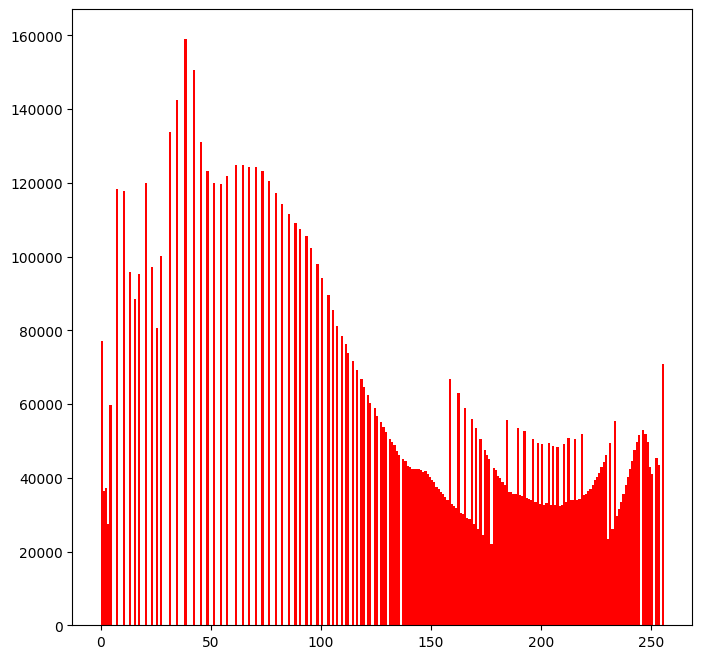

In [24]:
# Mostramos el histograma de la imagen resultante para ver la ecualizacion
plt.hist(out_image.flatten(),256,[0,256], color = 'r')
plt.show()

Por ultimo, aplciar la ecualizacion del histograma usando el metodo de opencv cv2.equalizeHist() para cada canal de la imagen.

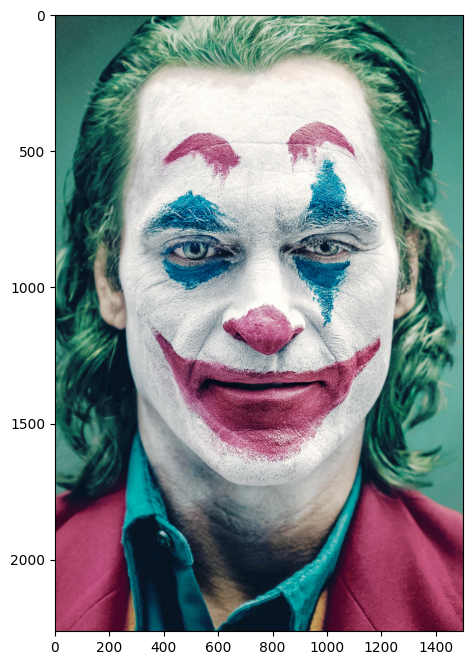

In [25]:
# copiamos la imagen
output_image = image.copy()

# calculamos el histograma con el metodo de opencv por cada canal
for i in range(image.shape[2]):
  output_image[:,:, i] = cv2.equalizeHist(image[:,:, i])

plt.imshow(out_image)
plt.show()

### **Curvas de color**
Las curvas de color son muy similares a las anteriores, pero aplicandolas en cada canal. El siguiente metodo dado nos permite hacer el uso de estas y aplicar filtros con diferentes efectos.

In [26]:
def plot_color_curves(originalR, originalG, originalB, rCurve, gCurve, bCurve):
  # pintamos el grafico de curvas
  plt.plot(originalR,rCurve, color='red')
  plt.plot(originalG,gCurve, color='green')
  plt.plot(originalB, bCurve, color='blue')
  plt.plot(np.arange(256), np.arange(256), color='black', linestyle='--')
  plt.show()

Para definir curvas de color seguir el ejemplo del codigo a continuacion


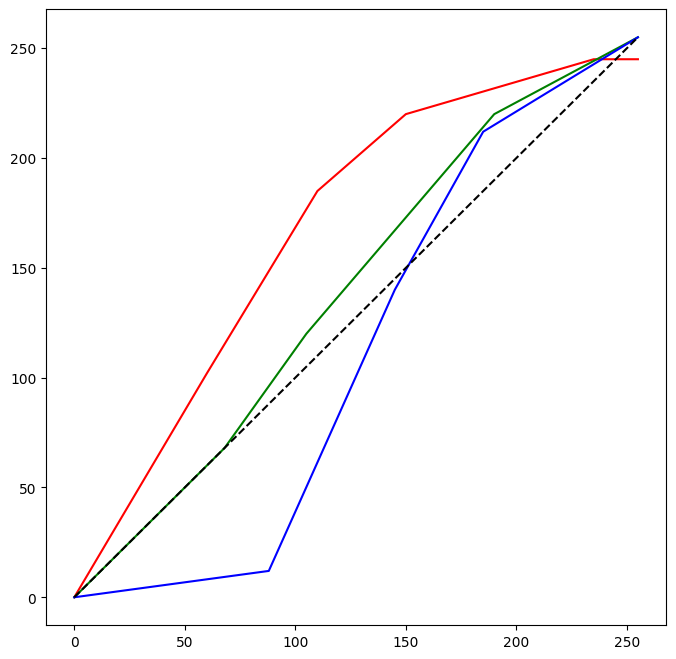

In [27]:
# Especificamos el eje X de las curvas de color
originalR = np.array([0, 60, 110, 150, 235, 255])
originalG = np.array([0, 68, 105, 190, 255])
originalB = np.array([0, 88, 145, 185, 255])

# Especificamos el eje Y de las curvas de color
rCurve = np.array([0, 102, 185, 220, 245, 245 ])
gCurve = np.array([0, 68, 120, 220, 255 ])
bCurve = np.array([0, 12, 140, 212, 255])

 # Creamos la lut
fullRange = np.arange(0,256)
rLUT = np.interp(fullRange, originalR, rCurve )
gLUT = np.interp(fullRange, originalG, gCurve )
bLUT = np.interp(fullRange, originalB, bCurve )

# pintamos el grafico de curvas
plot_color_curves(originalR, originalG, originalB, rCurve, gCurve, bCurve)

Una vez obtenidas las LUT podemos aplicarlas en la imagen de la siguiente manera

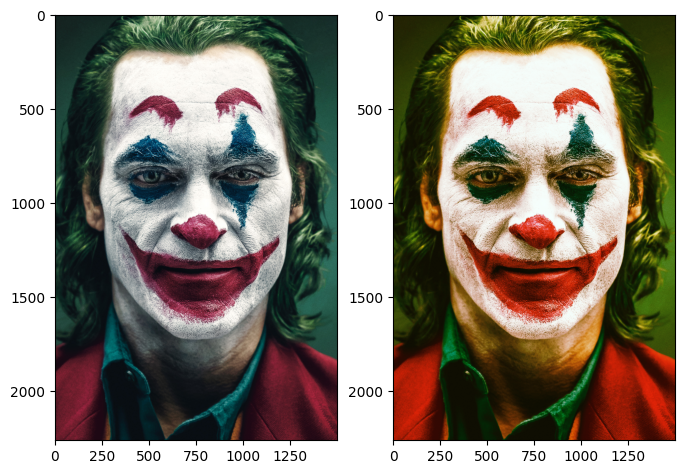

In [28]:
# copiamos la imagen orignal
out_image = image.copy()

# modificamos cada canal aplicando la lut correspondiente 
out_image[:,:,0] = cv2.LUT(image[:,:,0], rLUT)
out_image[:,:,1] = cv2.LUT(image[:,:,1], gLUT)
out_image[:,:,2] = cv2.LUT(image[:,:,2], bLUT)

plt.subplot(121), plt.imshow(image)
plt.subplot(122), plt.imshow(out_image)
plt.show()